In [6]:
from chainer.links import VGG16Layers
from PIL import Image

model = VGG16Layers()
img = Image.open("burger.png")
predict = model.predict([img])[0]

showtop5(predict)

0 n07697537ホットドッグ、ホットドッグ、レッドホット
1 n07697313チーズバーガー
2 n07693725ベーグル、ベーゲル
3 n07684084フレンチローフ
4 n02776631ベーカリー、ベークショップ、ベーキングハウス


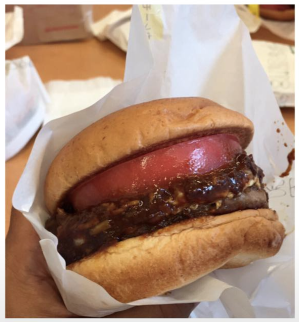

In [8]:
# 対象画像
img = Image.open("burger.png")
img.resize(np.array(img.size)//1) 

In [4]:
import numpy as np
# ILSVSR１２のカテゴリデータ　　https://github.com/HoldenCaulfieldRye/caffe/blob/master/data/ilsvrc12/synset_words.txt
categories = np.loadtxt("synset_words.txt",str,delimiter='\t')

# Google 翻訳サービスを使う
import requests
import re
url = 'https://translate.google.com/?hl=ja#en/ja/'

def translate(estring):
    r = requests.get(url, params={'q': estring})
 
    pattern = "TRANSLATED_TEXT=\'(.*?)\'"
    jstring = re.search(pattern, r.text).group(1)
 
    return jstring
# 確率リストとしての出力からトップ５を出力するメソッド
def showtop5(prob): # prob は最終層から出力される確率リスト（Variable構造体)
    top5args = np.argsort(prob.data)[:-6:-1] # 上位５つの番号
    top5probs = prob.data[top5args] # 上位５つの確率
    for rank,(p,words) in enumerate(zip(top5probs,categories[top5args])):
        print(rank,translate(words))

参考
- [chainerのVGG16 pretrainモデルを早速使ってみた](http://snowman-88888.hatenablog.com/entry/2017/04/01/043624)